In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска (GD) и (стохастического градиентного спуска (SGD) или mini-batch градиентного спуска). Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
from sklearn import datasets

X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([86.85290273, 74.10093365])

In [4]:
def mse_error(X,w,y):
    y_pred = X.dot(w)
    sse = np.sum((y - y_pred)**2)
    return sse / len(y)

In [5]:
def GD(X, y, alpha = 1e-3, min_weight_dist=1e-5, max_iter=1e5, l1=0, l2=0, seed=42):
    np.random.seed(seed)
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = [mse_error(X,w,y)]
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist =  min_weight_dist
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        new_w = w - 2 * alpha * (np.dot(X.T, (np.dot(X,w) - y)) / X.shape[0] + l1 * np.sign(w) + 2 *l2 *w)

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mse_error(X, new_w, y))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)
    error_list= np.array(errors)

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во инераций - {iter_num}')
    print(f'Веса - {new_w}')
    return w_list, error_list

In [6]:
%%time
w_gd, err_gd = GD(X, y, alpha=0.05, min_weight_dist=1e-8)

В случае использования градиентного спуска функционал ошибки составляет 28.7649
Кол-во инераций - 265
Веса - [86.8529026  74.10093367]
Wall time: 22 ms


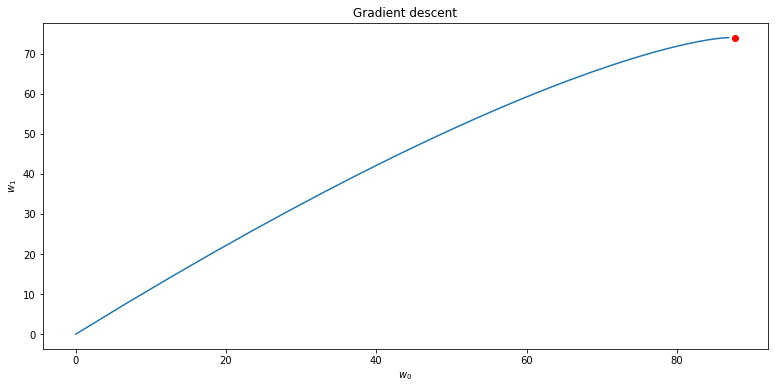

In [7]:
# визиализируем изменения весов 
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

#plt.scatter(w_gd[:,0], w_gd[:,1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_gd[:,0], w_gd[:, 1]);

Стохастический градиентный спуск.

In [8]:
def SGD(X, y, alpha = 1e-3, min_weight_dist=1e-5, max_iter=1e5, l1=0, l2=0, seed=42):
    np.random.seed(seed)
    n = X.shape[0]
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = [mse_error(X,w,y)]
    # шаг градиентного спуска
    alpha=alpha
    # максимальное число итераций
    max_iter =  max_iter
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist =  min_weight_dist
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        y_pred = np.dot(X[train_ind], w)
        
        
        

        new_w = w - 2 * 1/n * alpha * (np.dot(X[train_ind].T, (y_pred - y[train_ind])) + l1 * np.sign(w) + 2 *l2 *w)

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mse_error(X, new_w, y))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)
    error_list= np.array(errors)

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во инераций - {iter_num}')
    print(f'Веса - {new_w}')
    return w_list, error_list


In [9]:
%%time
w_sgd, err_sgd = SGD(X, y, alpha=5, min_weight_dist=1e-3)

В случае использования градиентного спуска функционал ошибки составляет 29.5552
Кол-во инераций - 853
Веса - [86.10952688 73.49696645]
Wall time: 79 ms


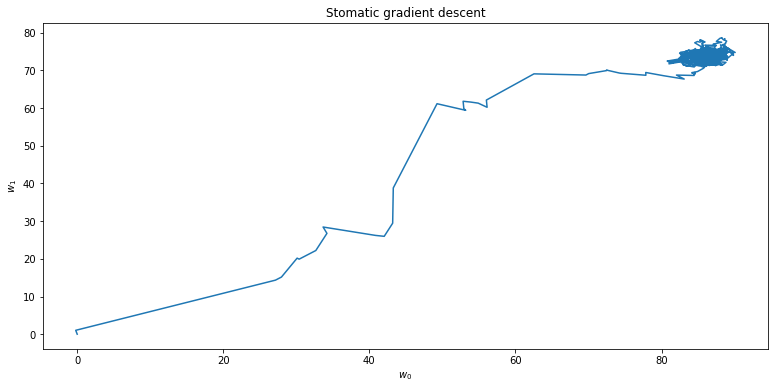

In [10]:
# визиализируем изменения весов 
plt.figure(figsize=(13, 6))
plt.title('Stomatic gradient descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

#plt.scatter(w_sgd[:,0], w_sgd[:,1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_sgd[:,0], w_sgd[:, 1]);

mbGD

Mini-Batch Gradient Descent

In [11]:
def mbGD(X, y, qty_in_batch, alpha = 1e-4, tolerance=1e-6, max_iter=1e5, l1=0, l2=0, seed=42):
    np.random.seed(seed)
    n = X.shape[0]
    # инициализируем начальный вектор весов
    w = np.random.randn(X.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = [mse_error(X,w,y)]
    n_batch = n// qty_in_batch
    if n % qty_in_batch !=0:
        n_batch +=1
    err = 1e10
    # счетчик итераций
    iter_num = 0
    while iter_num < max_iter:
        xy = np.c_[X,y]
        np.random.shuffle(xy)
        X = xy[:,:-1]
        y= xy[:,-1]
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            w_new = w - alpha * (1/len(y) * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
            w = w_new
        err_new = mse_error(X, w_new, y)
        if np.abs(err_new - err) <= tolerance:
            break
        else:
            err = err_new
            w_list.append(w_new.copy())
            errors.append(err_new)
        iter_num += 1
        
    w_list = np.array(w_list)
    error_list= np.array(errors)

    print(f'В случае использования Mini-Batch функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во инераций - {iter_num}')
    print(f'Веса - {w_new}')
    return w_list, error_list

In [12]:
%%time
w_mbgd, err_mbgd = mbGD(X, y, qty_in_batch=8, alpha =0.05, tolerance=1e-3, max_iter=1e4)

В случае использования Mini-Batch функционал ошибки составляет 28.7716
Кол-во инераций - 91
Веса - [86.76245679 74.09460009]
Wall time: 53 ms


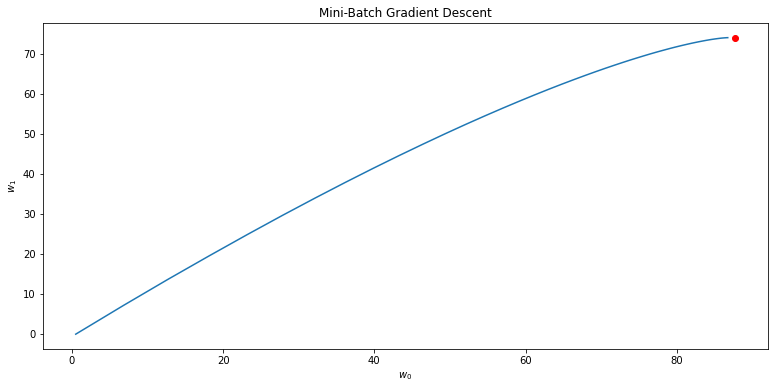

In [13]:
# визиализируем изменения весов 
plt.figure(figsize=(13, 6))
plt.title('Mini-Batch Gradient Descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

#plt.scatter(w_sgd[:,0], w_sgd[:,1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_mbgd[:,0], w_mbgd[:, 1]);

Plot w

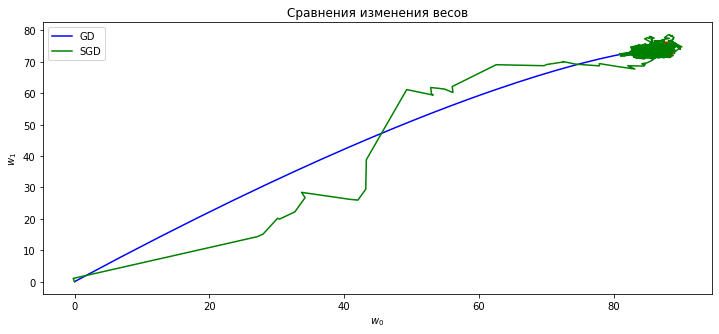

In [14]:
plt.figure(figsize=(12, 5))
plt.title('Сравнения изменения весов')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.plot(w_gd[:,0], w_gd[:, 1], c='b', label='GD');
plt.plot(w_sgd[:,0], w_sgd[:, 1], c='g', label='SGD');
plt.scatter(coef[0], coef[1], linewidth=10, c='r');
plt.legend();

Plot MSE

In [15]:
len(err_gd), len(err_sgd)

(266, 854)

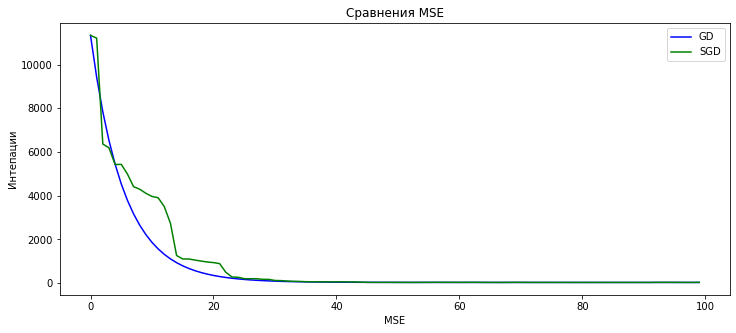

In [16]:
plt.figure(figsize=(12, 5))
plt.title('Сравнения MSE')
plt.xlabel(r'MSE')
plt.ylabel(r'Интепации')

n = min(len(err_gd), len(err_sgd), 100)
plt.plot(err_gd[:n], c='b', label='GD');
plt.plot(range(n), err_sgd[:n], c='g', label='SGD');
plt.legend();